In [1]:
import uv_magic

uv_magic library imported successfully!


In [2]:
from uv_magic import UVMagic
from IPython.core.interactiveshell import InteractiveShell

shell = InteractiveShell.instance()
uv_magic = UVMagic(shell)

In [3]:
# First, load the extension
%load_ext uv_magic


In [11]:
%%uv_run --python 3.10 --with pandas

import pandas as pd

df = pd.DataFrame({'x': range(5), 'y': range(5)})
print(df.to_html())


,x,y
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4



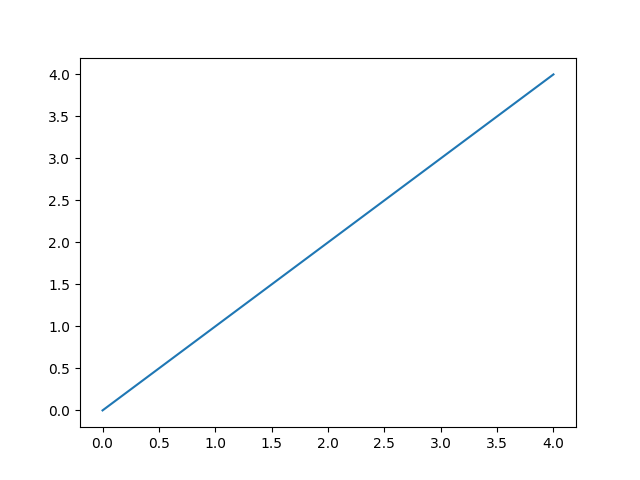

In [10]:
%%uv_run --python 3.10 --with pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'x': range(5), 'y': range(5)})
plt.plot(df['x'], df['y'])
print("Plot created")

Country,Product,Date,Revenue
Australia,Cookies,2015-07-01,200
Australia,Cookies,2015-08-01,180
Australia,Cookies,2015-09-01,160
Australia,Cookies,2015-10-01,220
Australia,Cookies,2015-11-01,200

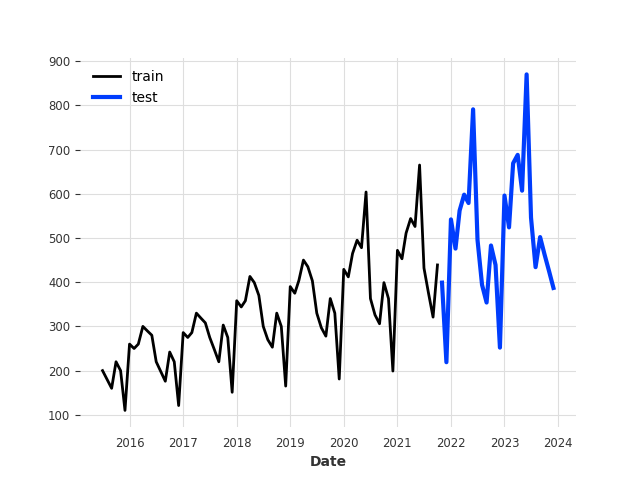

In [8]:
%%uv_run --python 3.9 --with pandas numpy openpyxl darts matplotlib 'llvmlite==0.36'

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

# Read the Excel file
df = (pd.read_excel('data/actuals.xlsx')
      .query("Country == 'Australia' and Product == 'Cookies'"))

# Display the DataFrame
print(df.head().to_html(index=False))

from darts import TimeSeries

# Create a TimeSeries object
series = TimeSeries.from_dataframe(
    df=df,
    time_col='Date',
    value_cols='Revenue',
    fill_missing_dates=True,
    freq='MS'
)
# print(series)

# Split the series into training and testing sets
series1, series2 = series.split_after(0.75)

# Plot the training and testing series
series1.plot(label='train')
series2.plot(label='test', lw=3)
